# Ansuman Das,
# 17PH20006

# Basics of cluster analysis

## Import the relevant libraries

In [2]:
!pip install ijson==2.2
#other packages comes with anaconda distribution

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ijson
import json

from pandas.io.json import json_normalize
sns.set()
from sklearn.cluster import KMeans


import re
import sys
import json
import re, string
import copy
from nltk.corpus import stopwords
import string
from string import punctuation
import random
from tqdm.notebook import tqdm

#sklearn 0.24.1
#nltk 3.2.4

## Load the data

In [4]:
# open json file
with open('Tweets.json','r') as file:
    data = json.load(file)

# json dictionary
#print(type(data))

In [5]:
# loading into a DataFrame
df_json = pd.DataFrame(data)
df_json.head()

,text,profile_image_url,from_user,from_user_id,geo,id,iso_language_code,from_user_id_str,created_at,source,id_str,from_user_name,profile_image_url_https,metadata,location
0,RT @ItsJennaMarbles: Reports of Marathon Runne...,http://a0.twimg.com/profile_images/3512588918/...,sangyashrestha,498073340,None,323906397609791488,en,498073340,"Mon, 15 Apr 2013 21:11:17 +0000",&lt;a href=&quot;http://twitter.com/&quot;&gt;...,323906397609791488,Sangya Shrestha ♥,https://si0.twimg.com/profile_images/351258891...,{'result_type': 'recent'},NaN
1,RT @NBCSN: Reports of Marathon Runners that cr...,http://a0.twimg.com/profile_images/3507962495/...,ChelseaGilson,204343844,None,323906397618196483,en,204343844,"Mon, 15 Apr 2013 21:11:17 +0000",&lt;a href=&quot;http://twitter.com/&quot;&gt;...,323906397618196483,Chelsea Gilson,https://si0.twimg.com/profile_images/350796249...,{'result_type': 'recent'},NaN
2,RT @NBCSN: Reports of Marathon Runners that cr...,http://a0.twimg.com/profile_images/1257114694/...,Blakstoise,258550118,None,323906397735641088,en,258550118,"Mon, 15 Apr 2013 21:11:17 +0000",&lt;a href=&quot;http://twitter.com/download/i...,323906397735641088,Eric Madison,https://si0.twimg.com/profile_images/125711469...,{'result_type': 'recent'},NaN
3,RT @PeterBurnsRadio: RT @NBCSN: Reports of Mar...,http://a0.twimg.com/profile_images/1302505443/...,markson,14515822,None,323906397853073410,en,14515822,"Mon, 15 Apr 2013 21:11:17 +0000",&lt;a href=&quot;http://twitter.com/&quot;&gt;...,323906397853073410,markson,https://si0.twimg.com/profile_images/130250544...,{'result_type': 'recent'},NaN
4,RT @NBCSN: Reports of Marathon Runners that cr...,http://a0.twimg.com/profile_images/3397207210/...,MarlyCakes85,376367793,None,323906397962121216,en,376367793,"Mon, 15 Apr 2013 21:11:17 +0000",&lt;a href=&quot;http://twitter.com/download/a...,323906397962121216,Marlene,https://si0.twimg.com/profile_images/339720721...,{'result_type': 'recent'},NaN


1. # removing hashtags and cleaning up

In [6]:
# remove the hashtags, mentions and unwanted characters.
def clean_text(df, text_field):



    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r' (@[A-Za-z0–9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?', "", elem)) 
    
    return df

df_json = clean_text(df_json, 'text')
df_json.head()

,text,profile_image_url,from_user,from_user_id,geo,id,iso_language_code,from_user_id_str,created_at,source,id_str,from_user_name,profile_image_url_https,metadata,location
0,reports of marathon runners that crossed fini...,http://a0.twimg.com/profile_images/3512588918/...,sangyashrestha,498073340,None,323906397609791488,en,498073340,"Mon, 15 Apr 2013 21:11:17 +0000",&lt;a href=&quot;http://twitter.com/&quot;&gt;...,323906397609791488,Sangya Shrestha ♥,https://si0.twimg.com/profile_images/351258891...,{'result_type': 'recent'},NaN
1,reports of marathon runners that crossed fini...,http://a0.twimg.com/profile_images/3507962495/...,ChelseaGilson,204343844,None,323906397618196483,en,204343844,"Mon, 15 Apr 2013 21:11:17 +0000",&lt;a href=&quot;http://twitter.com/&quot;&gt;...,323906397618196483,Chelsea Gilson,https://si0.twimg.com/profile_images/350796249...,{'result_type': 'recent'},NaN
2,reports of marathon runners that crossed fini...,http://a0.twimg.com/profile_images/1257114694/...,Blakstoise,258550118,None,323906397735641088,en,258550118,"Mon, 15 Apr 2013 21:11:17 +0000",&lt;a href=&quot;http://twitter.com/download/i...,323906397735641088,Eric Madison,https://si0.twimg.com/profile_images/125711469...,{'result_type': 'recent'},NaN
3,rt reports of marathon runners that crossed f...,http://a0.twimg.com/profile_images/1302505443/...,markson,14515822,None,323906397853073410,en,14515822,"Mon, 15 Apr 2013 21:11:17 +0000",&lt;a href=&quot;http://twitter.com/&quot;&gt;...,323906397853073410,markson,https://si0.twimg.com/profile_images/130250544...,{'result_type': 'recent'},NaN
4,reports of marathon runners that crossed fini...,http://a0.twimg.com/profile_images/3397207210/...,MarlyCakes85,376367793,None,323906397962121216,en,376367793,"Mon, 15 Apr 2013 21:11:17 +0000",&lt;a href=&quot;http://twitter.com/download/a...,323906397962121216,Marlene,https://si0.twimg.com/profile_images/339720721...,{'result_type': 'recent'},NaN


# Kmeans class with jccard distance, Silhouette methode

In [7]:


regex = re.compile('[%s]' % re.escape(string.punctuation))
cachedStopWords = stopwords.words('english')

class kMeans():
    def __init__(self, seeds, tweets):
        self.seeds = seeds
        self.tweets = tweets
        self.max_iterations = 1000
        self.k = len(seeds)

        self.clusters = {} # cluster to tweetID
        self.rev_clusters = {} # reverse index, tweetID to cluster
        self.jaccardMatrix = {} # stores pairwise jaccard distance in a matrix

        self.initializeClusters()
        self.initializeMatrix()
        
    def jaccardDistance(self, setA, setB):
        # Calcualtes the Jaccard Distance of two sets
        try:
            return 1 - float(len(setA.intersection(setB))) / float(len(setA.union(setB)))
        except TypeError:
            print ('Invalid type. Type set expected.')
    def bagOfWords(self, string):
        # Returns a bag of words from a given string
        # Space delimited, removes punctuation, lowercase
        # Cleans text from url, stop words, tweet @, and 'rt'
        words = string.lower().strip().split(' ')
        for word in words:
            word = word.rstrip().lstrip()
            if not re.match(r'^https?:\/\/.*[\r\n]*', word) \
            and not re.match('^@.*', word) \
            and not re.match('\s', word) \
            and word not in cachedStopWords \
            and word != 'rt' \
            and word != '':
                yield regex.sub('', word)
                
    def initializeMatrix(self):
        # Dynamic Programming: creates matrix storing pairwise jaccard distances
        for ID1 in self.tweets:
            self.jaccardMatrix[ID1] = {}
            bag1 = set(self.bagOfWords(self.tweets[ID1]))
            for ID2 in self.tweets:
                if ID2 not in self.jaccardMatrix:
                    self.jaccardMatrix[ID2] = {}
                bag2 = set(self.bagOfWords(self.tweets[ID2]))
                distance = self.jaccardDistance(bag1, bag2)
                self.jaccardMatrix[ID1][ID2] = distance
                self.jaccardMatrix[ID2][ID1] = distance
                
    def initializeClusters(self):
        # Initialize tweets to no cluster
        for ID in self.tweets:
            self.rev_clusters[ID] = -1

        # Initialize clusters with seeds
        for k in range(self.k):
            self.clusters[k] = set([self.seeds[k]])
            self.rev_clusters[self.seeds[k]] = k
            
    def calcNewClusters(self):
        # Initialize new cluster
        new_clusters = {}
        new_rev_cluster = {}
        loss_total=0
        for k in range(self.k):
            new_clusters[k] = set()

        for ID in self.tweets:
            min_dist = float("inf")
            min_dist1 = float("inf")
            min_cluster = self.rev_clusters[ID]

            # Calculate min average distance to each cluster
            cnt=0
            for k in self.clusters:
                dist = 0
                count = 0
                cnt+=1
                for ID2 in self.clusters[k]:
                    dist += self.jaccardMatrix[ID][ID2]
                    count += 1
                if count > 0:
                    avg_dist = dist/float(count)
                    if min_dist > avg_dist:
                        min_dist = avg_dist
                        min_cluster = k
                        
            for k in self.clusters:
                if(k==min_cluster):
                    continue
                dist = 0
                count = 0
                cnt+=1
                for ID2 in self.clusters[k]:
                    dist += self.jaccardMatrix[ID][ID2]
                    count += 1
                if count > 0:
                    avg_dist1 = dist/float(count)
                    if min_dist1 > avg_dist1:
                        min_dist1 = avg_dist1
                        min_prev = k
                        
                        
                        
            a = 0
            b = 0
            count = 0  

            
            for ID2 in self.clusters[min_cluster]:
                a += self.jaccardMatrix[ID][ID2]
                count +=1
            
            for ID2 in self.clusters[min_prev]:
                b += self.jaccardMatrix[ID][ID2]

            if(count==1):
                loss_total+=0
            else:
                
                loss_total+=(b-a)/max(a,b)
            new_clusters[min_cluster].add(ID)
            new_rev_cluster[ID] = min_cluster
        
        loss_total=loss_total/len(self.tweets)
        
        return new_clusters, new_rev_cluster, loss_total
    
    
    def converge(self):
        # Initialize previous cluster to compare changes with new clustering
        new_clusters, new_rev_clusters, _ = self.calcNewClusters()
        self.clusters = copy.deepcopy(new_clusters)
        self.rev_clusters = copy.deepcopy(new_rev_clusters)

        # Converges until old and new iterations are the same
        iterations = 1
        while iterations < self.max_iterations:
            new_clusters, new_rev_clusters,_ = self.calcNewClusters()
            iterations += 1
            if self.rev_clusters != new_rev_clusters:
                self.clusters = copy.deepcopy(new_clusters)
                self.rev_clusters = copy.deepcopy(new_rev_clusters)
            else:
                #print iterations
                return
            
    def printClusterText(self):
        # Prints text of clusters
        for k in self.clusters:
            for ID in self.clusters[k]:
                print(self.tweets[ID])
            print ('\n')
 
    def printClusters(self):
        # Prints cluster ID and tweet IDs for that cluster
        for k in self.clusters:
            print (str(k) + ':' + ','.join(map(str,self.clusters[k])))

    def printMatrix(self):
        # Prints jaccard distance matrix
        for ID in self.tweets:
            for ID2 in self.tweets:
                print (ID, ID2, self.jaccardMatrix[ID][ID2])
                
    
tweets={}
for i in range(len(df_json['id'])):
    temp = df_json['text'][i]
    temp = temp.replace("'","")
    temp = temp.replace("[","")
    temp = temp.replace("]","")
    df_json['text'][i]=temp
    
    
    tweets[df_json['id'][i]] = temp

    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
def loss_kmeans(tweets=tweets,k=24,df_json=df_json):
    
    ids=list(df_json['id'])
    random.shuffle(ids)
    seeds=ids[0:k]
    kmeans = kMeans(seeds, tweets)
    kmeans.converge()
    result=kmeans.clusters
    dist=kmeans.jaccardMatrix
    _,_,square_dist=kmeans.calcNewClusters()

    total=0

    for i in result:
        for k in result:
            if(i!=k):
                continue
            temp=[]
            for j in result[i]:
                for l in result[k]:
                    #print(i,j,k,l)
                    #print(dist[j][l])
                    #temp.append(dist[j][l])
                    total=total+dist[j][l]**2
            
            #if(len(temp)>0):
            #    total=total+max(temp)**2 
    
            
    total=total/2
    
    return square_dist

  0%|          | 0/27 [00:00<?, ?it/s]

Text(0, 0.5, 'Loss')

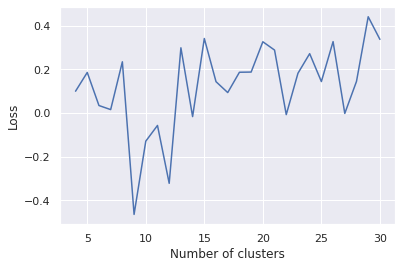

In [9]:
loss=[]
cluster_size=[]
for i in tqdm(range(3,30)):
    loss.append(loss_kmeans(tweets=tweets,k=i,df_json=df_json))
    cluster_size.append(i+1)
plt.plot(cluster_size,loss)
plt.xlabel('Number of clusters')
plt.ylabel('Loss')

# Taking k=24

In [10]:
k=24
ids=list(df_json['id'])
random.shuffle(ids)
seeds=ids[0:k]
kmeans = kMeans(seeds, tweets)
kmeans.converge()
result=kmeans.clusters



In [11]:

col=[]
numbers=[]
for i in result:
    print("Cluster:  -->",i)
    print('-'*100)
    col.append("cluster "+str(i))
    cnt=0
    for j in result[i]:
        cnt+=1
        print(j)
        print(tweets[j])
    
    numbers.append(cnt)

Cluster:  --> 0
----------------------------------------------------------------------------------------------------
324375472681148416
 if you are trying to defeat the human spirit marathoners are the wrong group to target bostonmarathon tcot tgdn
324219503401644033
if you are trying to defeat the human spirit marathoners are the wrong group to target amen bostonmarathon
324366333829586945
if you are trying to defeat the human spirit marathoneers are the wrong group to target bostonmarathon
324376801382133761
 if you are trying to defeat the human spirit marathoners are the wrong group to target bostonmarathon tcot tgdn
324358798179459073
if you are trying to defeat the human spirit marathoners are the wrong group to target
324419757661097984
mikandynothem if you are trying to defeat the human spirit marathoners are the wrong group to target bostonmarathon tcot tgdn
Cluster:  --> 1
----------------------------------------------------------------------------------------------------
324

In [12]:
df=pd.DataFrame([],columns=col)
df_length = len(df)
df.loc[df_length] = numbers
df

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,...,cluster 14,cluster 15,cluster 16,cluster 17,cluster 18,cluster 19,cluster 20,cluster 21,cluster 22,cluster 23
0,6,20,18,6,9,37,12,16,10,0,...,9,16,2,25,0,4,1,0,26,6


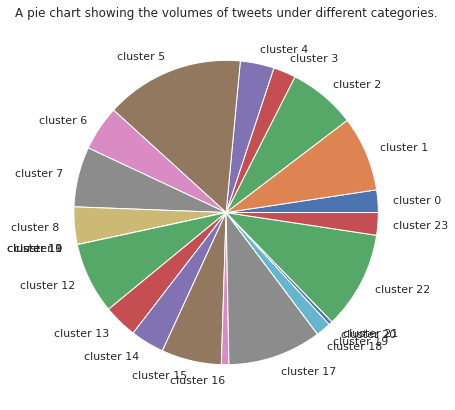

In [13]:
fig = plt.figure(figsize =(10, 7)) 
#a = new_groups_df.drop(['total'], axis = 1)
plt.pie(df.loc[df_length], labels = df.columns)
plt.title('A pie chart showing the volumes of tweets under different categories.')
plt.show()